### Intruduction to Scikit-Learn (sklearn)

This notebook demonstrate some of the most useful functions of the beautiful Scikit-Learn Library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [30]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\hcarvalh\Desktop\Machine_Learning_ZTM_course\Sample_project_1\env\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.3
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\hcarvalh\Desktop\Machine_Learning_ZTM_course\Sample_project_1\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\hcarvalh\Desktop\Machine_Learning_ZTM_course\Sample_project_1\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_t

In [9]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# 1. Get the data ready
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (Label matrix)
Y = heart_disease["target"]

In [15]:
# 2. Choose the right model and hyperparemeters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparemeters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3


In [19]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3


In [16]:
# Make a prediction
Y_preds = clf.predict(X_test)
Y_preds
#Y_label = clf.predict(np.array([0, 2, 3, 4]))

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [17]:
Y_test

130    1
257    0
159    1
94     1
52     1
      ..
58     1
148    1
71     1
223    0
290    0
Name: target, Length: 61, dtype: int64

In [18]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, Y_train)

1.0

In [19]:
clf.score(X_test, Y_test)

0.7868852459016393

In [21]:
# Import sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [22]:
confusion_matrix(Y_test, Y_preds)

array([[20,  8],
       [ 5, 28]], dtype=int64)

In [23]:
accuracy_score(Y_test, Y_preds)

0.7868852459016393

In [27]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)* 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [28]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [29]:
# Load model
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8524590163934426

## 1. Getting our data ready to be used with ML

Three main things we have to do:

    1. Split the data into features and Labels (usually X and Y)
    2. Filling (also called imputing or disregarding missing values)
    3. Converting non-numerical values to numerical values (also called featuring encoding)    

In [35]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
# Create Y (Label matrix)
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [42]:
X.shape[0] * 0.8

242.4

In [43]:
242 + 61

303

In [41]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [44]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [45]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [46]:
len(car_sales)

1000

In [48]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [49]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into Tranining and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
# Build ML Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

ValueError: could not convert string to float: 'Toyota'

In [55]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
                                
transformed_X = transformer.fit_transform(X)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [56]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [88]:
# Other way to turn categories into numbers
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype=float)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model.fit(X_train, Y_train);

In [62]:
model.score(X_test, Y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Is to fill them with some value (also known as inputation)
2. Remove the samples with missing data altogether

In [89]:
# 1. Import car_sales missing Data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [67]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [71]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

# Split into Tranining and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [86]:
# Let's try to convert our Data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
                                
transformed_X = transformer.fit_transform(X)
transformed_X 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [73]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [74]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [76]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [77]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [81]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [83]:
# Let's try to convert our Data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
                                
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [90]:
# 1. Import car_sales missing Data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [91]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [92]:
# Drop the rows with no labels 
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [93]:
# Split into X & Y
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [94]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical with "mean"
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [97]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make","Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [98]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
                                
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [103]:
# Now we got our data as numbers. Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.21990196728583944

In [104]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## Choosing the right estimator/ Algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category 
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator 
* Regretion problem - predicitng a number

If you're working on a machine learning problem and you're not sure what model to use, plesase, refer to the ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

''## 2.1 Picking a machine learning model for a regression problem
Let's use the California housing data set

In [40]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [47]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [48]:
# import algorithm
from sklearn.linear_model import Ridge

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
model = Ridge()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.5758549611440126

In [46]:
# Try different models to improve our results
# import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8065734772187598

# 2.2 Picking a ML model for a classification problem

In [137]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Consulting the map and it instructed us to use the `linearSVC`

In [144]:
# Import the linearSVC 
from sklearn.svm import LinearSVC

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

C:\Users\hcarvalh\Desktop\Machine_Learning_ZTM_course\Sample_project_1\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [139]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [27]:
# Import the linearSVC 
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

### TIDBIT

* If you have structured data, use ensemble methods
* If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm and use it to make predictions on our data
### 3.1 Fiting the model to the data

Different names for:
* `X` = features, features variables, data
* `Y` = lables, targets, target variables

In [28]:
# Import the linearSVC 
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, Y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learnd)
clf.score(X_test, Y_test)

0.8524590163934426

In [150]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [151]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions a Machine Learning Model 

2 Ways to make predictions:
* predict()
* predict_proba()

In [29]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

C:\Users\hcarvalh\Desktop\Machine_Learning_ZTM_course\Sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [32]:
np.array([Y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [35]:
# Import the linearSVC 
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, Y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learnd)
clf.score(X_test, Y_test)

0.8524590163934426

In [33]:
# Compare predictions to truth labels to evaluate model
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)

0.8524590163934426

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_preds)

0.8524590163934426

### Make predictions with `predict_proba()`

In [37]:
# predict_proba() returns probabilities os a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [38]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.

In [49]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Make predictions
Y_preds = model.predict(X_test)

In [52]:
Y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [54]:
np.array(Y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [58]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

0.32659871732073664

In [57]:
len(Y_preds)

4128

In [56]:
len(Y_test)

4128

In [60]:
housing_df["target"] 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a ML model

Three ways to evaluate Scikit-Learn models/ Estimators:

    1 Estimator's built-in `score()` method
    2 The `scoring` parameter
    3 Problem-specific metric functions

You can get more info about this here:https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [62]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [63]:
# Evaluate the Random Forest Classifier (use the patterns the model has learnd)
clf.score(X_train, Y_train)

1.0

In [64]:
clf.score(X_test, Y_test)

0.8524590163934426

### Let's use `score()` on our regression problem....

In [69]:
# import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [70]:
model.score(X_train, Y_train)

0.9736801960414609

In [71]:
model.score(X_test, Y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [73]:
from sklearn.model_selection import cross_val_score

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, Y_train);

In [74]:
clf.score(X_test, Y_test)

0.8524590163934426

In [75]:
cross_val_score(clf, X, Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [76]:
cross_val_score(clf, X, Y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [77]:
# Setup radom seed
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, Y_test)

# Take mean of 5-fold croos-validation score
clf_croos_val_score = np.mean(cross_val_score(clf, X, Y))

# Compare the two
clf_single_score, clf_croos_val_score

(0.8524590163934426, 0.8248087431693989)

In [78]:
# Scoring parameter set to None by default
cross_val_score(clf, X, Y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### 1. Accuracy

In [80]:
# 1. Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Setup radom seed
np.random.seed(42)

# Split into X/y
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Instantiate and fit the models 
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, Y)

In [82]:
np.mean(cross_val_score)

0.8248087431693989

In [83]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### 2. Area under ROC curve

*** Area under the receiver operating characteristic curve (ROC/AUC)***

** Area under curve - AUC
** ROC curve   

* ROC curves are a comparison of a model's true positive rate (tpr) vs a model false positive rate (fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [85]:
# 2. Area under ROC curve or AUC
from sklearn.metrics import roc_curve

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit the models 
clf.fit(X_train, Y_train)

# Make predictions with probabilities 
Y_probs = clf.predict_proba(X_test)
Y_probs[:10]

array([[0.7 , 0.3 ],
       [0.59, 0.41],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.27, 0.73],
       [0.91, 0.09],
       [0.38, 0.62],
       [0.1 , 0.9 ]])

In [87]:
Y_probs_positive = Y_probs[:, 1]
Y_probs_positive[:10]

array([0.3 , 0.41, 0.08, 0.92, 0.93, 0.97, 0.73, 0.09, 0.62, 0.9 ])

In [88]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

# Check the false positeve rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.14814815, 0.14814815, 0.18518519, 0.22222222,
       0.2962963 , 0.2962963 , 0.33333333, 0.37037037, 0.48148148,
       0.51851852, 0.59259259, 0.7037037 , 0.81481481, 0.85185185,
       0.92592593, 1.        ])

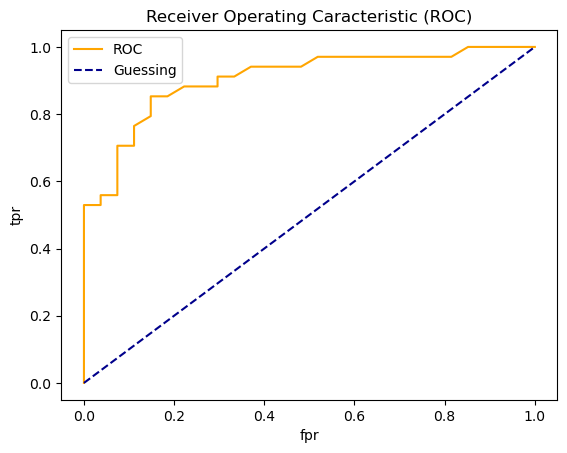

In [91]:
# Create a function for plotting ROD curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate(tpr) of a model.    
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("Receiver Operating Caracteristic (ROC)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr);

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_probs_positive)

0.9046840958605664

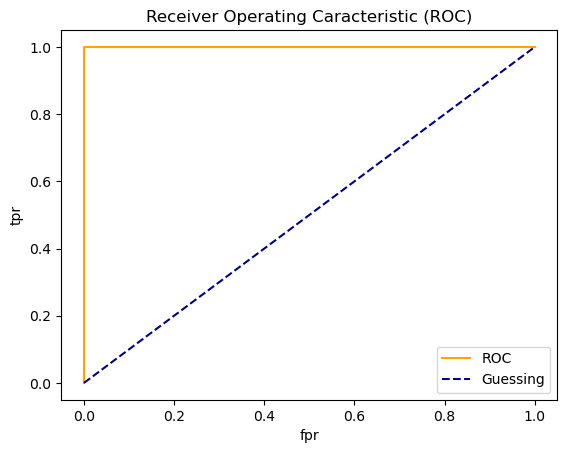

In [94]:
# Plot perfect ROC curve and AUC score
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr);

In [96]:
# Perfect AUC score
roc_auc_score(Y_test, Y_test)

1.0

### 3. Confusion Matrix

* A confusion matrix is a quick way to compare a label a model predicts and the actual labels it was supposed to predict.
* In essence, giving you an idea of where the model is getting confused.

In [97]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)

array([[23,  4],
       [ 7, 27]], dtype=int64)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test, Y_preds, rowsnames=["Actual"])